In [1]:
import sys, os 
sys.path.append("/usr/local/Cellar/root/6.14.04_2/lib/root") # add ROOTv6 
from ROOT import TFile, TStyle, TCanvas, gStyle, TF1, TPaveStats, gPad

Welcome to JupyROOT 6.14/04


In [2]:
# %load ~/rootlogon.py
from ROOT import TStyle, gROOT, gStyle, TColor 

def SetMyStyle():
  print("\n ~/rootlogon.C loaded with !!4 sig.fig.!! for custom Opt Fit and Stat!\n")
  MyStyle = myStyle()
  gROOT.SetStyle("MyStyle")
  gROOT.ForceStyle()


def myStyle():
  myStyle  = TStyle("MyStyle", "My Root Styles")
  #Canvas
  myStyle.SetCanvasBorderMode(0)  # Transparent
  myStyle.SetCanvasColor(0) # Transparent 
  #Paper, Pad, Palette, Frame
  myStyle.SetPadBorderMode(0) # Transparent 
  myStyle.SetPadColor(0) # Transparent 
  myStyle.SetPalette(1) # Default 
  myStyle.SetFrameBorderMode(1) # Border
   # Axis 
  myStyle.SetLabelSize(0.04, "xyz") # size of axis values
  myStyle.SetTitleSize(0.04, "xyz")
  myStyle.SetPadTickX(1)
  myStyle.SetPadTickY(1)
  # Title 
  myStyle.SetTitleColor(1) # Black 
  myStyle.SetTitleStyle(0) # Transparent 
  myStyle.SetTitleBorderSize(0) # Transparent
  myStyle.SetTitleY(0.97) # Set y-position (fraction of pad size)
  myStyle.SetTitleX(0.4) # Set x-position (fraction of pad size)
  # #Stat box dimensions, position and style 
  myStyle.SetStatY(0.89) # Set y-position (fraction of pad size)
  myStyle.SetStatX(0.89) # Set x-position (fraction of pad size)
  myStyle.SetStatW(0.36) # Set width of stat-box (fraction of pad size)
  myStyle.SetStatH(0.12) # Set height of stat-box (fraction of pad size)
  myStyle.SetStatStyle(0) # Transparent 
  myStyle.SetStatColor(0)  # Transparent
  myStyle.SetStatBorderSize(1) # Transparent
  # Histo Filling (visual)
  myStyle.SetHistFillColor(8)
  myStyle.SetHistFillStyle(3014)      
  # Stats display options 
  #myStyle.SetOptStat("ourRmMe") #over/under -flows, Rms and Means with errors, number of entries
  myStyle.SetOptStat("neouRM") #over/under -flows, Rms and Means with errors, number of entries
  myStyle.SetOptFit(1111)  #probability, Chi2, errors, name/values of parameters
  myStyle.SetStatFormat("11.4f")  # 4 sig.fig, f=float

  return myStyle

In [37]:
SetMyStyle()


 ~/rootlogon.C loaded with !!4 sig.fig.!! for custom Opt Fit and Stat!



In [3]:
# %load /Users/gleb/software/gm2Style/gm2Style.py
from ROOT import TStyle, gROOT 


def SetGm2Style():
    print("Applying g-2 style settings...")
    Gm2Style = gm2Style()
    gROOT.SetStyle("gm2")
    gROOT.ForceStyle()


def gm2Style():

    gm2Style = TStyle("gm2","gm2 style")

    #use plain black on white colors
    icol=0 # WHITE
    gm2Style.SetFrameBorderMode(icol)
    gm2Style.SetFrameFillColor(icol)
    gm2Style.SetCanvasBorderMode(icol)
    gm2Style.SetCanvasColor(icol)
    gm2Style.SetPadBorderMode(icol)
    gm2Style.SetPadColor(icol)
    gm2Style.SetStatColor(icol)

    #set the paper & margin sizes
    gm2Style.SetPaperSize(20,26)

    #set margin sizes
    gm2Style.SetPadTopMargin(0.05)
    gm2Style.SetPadRightMargin(0.05)
    gm2Style.SetPadBottomMargin(0.16)
    gm2Style.SetPadLeftMargin(0.16)

    #set title offsets (for axis label)
    gm2Style.SetTitleXOffset(1.4)
    gm2Style.SetTitleYOffset(1.4)

    #use large fonts
    font=72 # Helvetica italics
    font=42 # Helvetica
    tsize=0.05
    gm2Style.SetTextFont(font)

    gm2Style.SetTextSize(tsize)
    gm2Style.SetLabelFont(font,"x")
    gm2Style.SetTitleFont(font,"x")
    gm2Style.SetLabelFont(font,"y")
    gm2Style.SetTitleFont(font,"y")
    gm2Style.SetLabelFont(font,"z")
    gm2Style.SetTitleFont(font,"z")

    gm2Style.SetLabelSize(tsize,"x")
    gm2Style.SetTitleSize(tsize,"x")
    gm2Style.SetLabelSize(tsize,"y")
    gm2Style.SetTitleSize(tsize,"y")
    gm2Style.SetLabelSize(tsize,"z")
    gm2Style.SetTitleSize(tsize,"z")

   #use bold lines and markers
    gm2Style.SetMarkerStyle(20)
    gm2Style.SetMarkerSize(1.2)
    gm2Style.SetHistLineWidth(2)
    gm2Style.SetLineStyleString(2,"[12 12]") # postscript dashes

    #get rid of X error bars (as recommended in ATLAS figure guidelines)
    gm2Style.SetErrorX(0.0001)
    # get rid of error bar caps
    gm2Style.SetEndErrorSize(0.)

    #do not display any of the standard histogram decorations
    gm2Style.SetOptTitle(0)
    gm2Style.SetOptStat(0)
    gm2Style.SetOptFit(0)

    #put tick marks on top and RHS of plots
    gm2Style.SetPadTickX(1)
    gm2Style.SetPadTickY(1)

    return gm2Style





In [7]:

SetGm2Style()

Applying g-2 style settings...


In [22]:
#TODO put in loops over np-arrays (i.e. dont use for!)

file_run1 = TFile.Open("Extrap/run1/trackRecoPlots.root")
file_run5 = TFile.Open("Extrap/run5/trackRecoPlots.root")
station12Path = "Extrapolation/vertices/station12/pValue>0.005_and_noVolumesHit/"
station18Path = "Extrapolation/vertices/station18/pValue>0.005_and_noVolumesHit/"

plotNames=["h_radialPos", "h_verticalPos"]

s12_rad_run1 = file_run1.Get(str(station12Path)+plotNames[0])
s18_rad_run1 = file_run1.Get(str(station18Path)+plotNames[0])
s12_ver_run1 = file_run1.Get(str(station12Path)+plotNames[1])
s18_ver_run1 = file_run1.Get(str(station18Path)+plotNames[1])

s12_rad_run5 = file_run5.Get(str(station12Path)+plotNames[0])
s18_rad_run5 = file_run5.Get(str(station18Path)+plotNames[0])
s12_ver_run5 = file_run5.Get(str(station12Path)+plotNames[1])
s18_ver_run5 = file_run5.Get(str(station18Path)+plotNames[1])


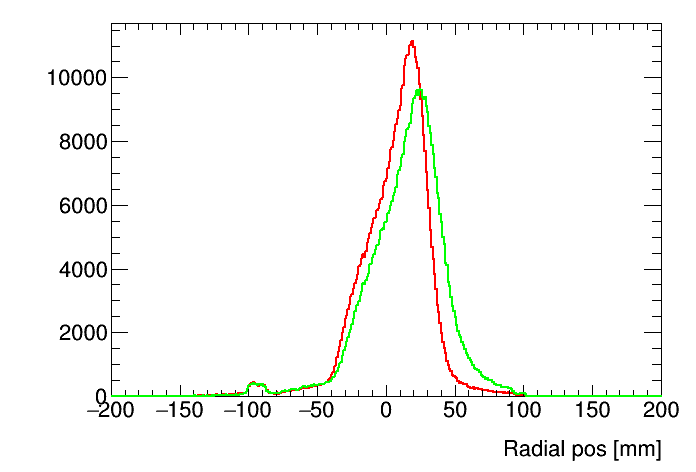

In [39]:
c=TCanvas()
st = gPad.GetPrimitive("stats")
# # st.SetName(newname)
# st.SetX1NDC(newx1) #new x start position
# st.SetX2NDC(newx2) #new x end position
s12_rad_run1.Draw()
s12_rad_run1.SetLineColor(2)
s12_rad_run5.SetLineColor(3)
s12_rad_run5.Draw("sames")
c.Draw()

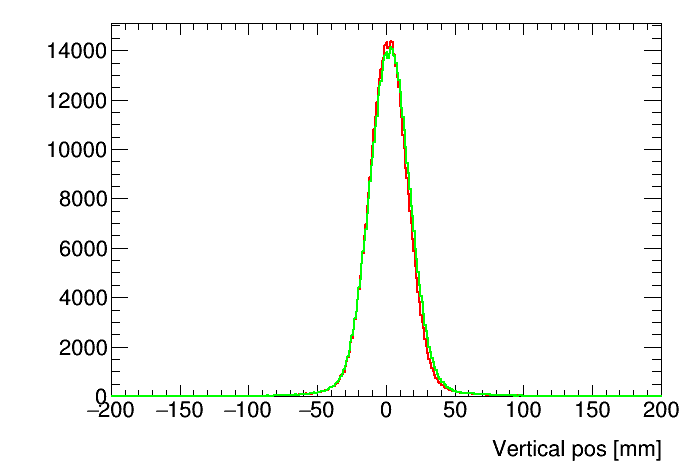

In [24]:
c=TCanvas()
s12_ver_run1.Draw()
s12_ver_run1.SetLineColor(2)
s12_ver_run5.Draw("SAME")
s12_ver_run5.SetLineColor(3)

c.Draw()

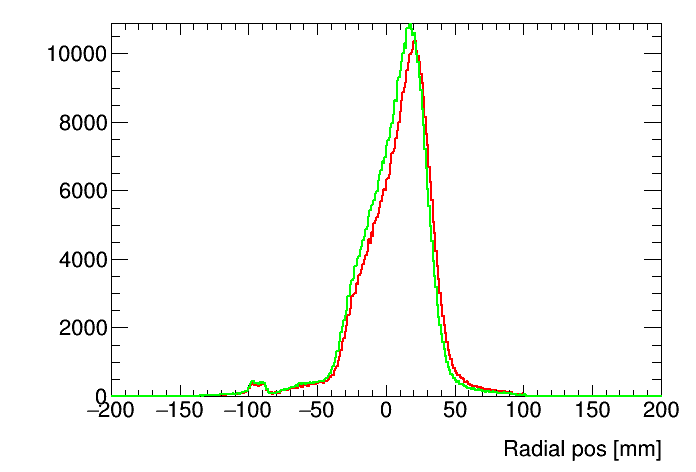

In [26]:
c=TCanvas()
s18_rad_run1.Draw()
s18_rad_run1.SetLineColor(2)
s18_rad_run5.Draw("SAME")
s18_rad_run5.SetLineColor(3)

c.Draw()

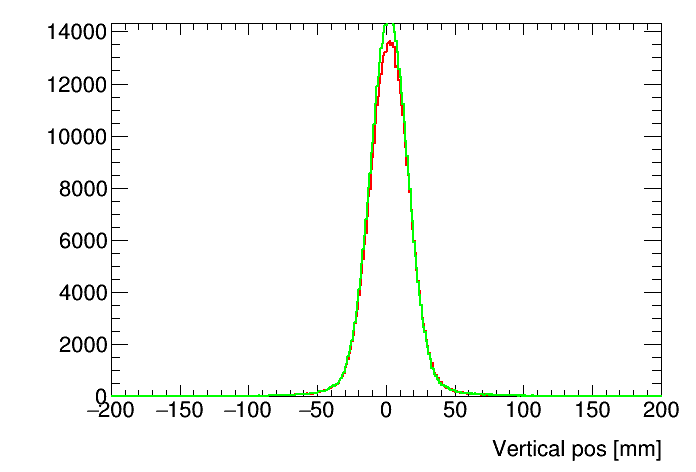

In [25]:
c=TCanvas()
s18_ver_run1.Draw()
s18_ver_run1.SetLineColor(2)
s18_ver_run5.Draw("SAME")
s18_ver_run5.SetLineColor(3)

c.Draw()

In [27]:
# from ROOT import JSROOT
# enableJSVis()
# c.Draw()
# disableJSVis()